Titanic Tagesaufgabe
# Aufgabe 1: Dataset laden und Überblick verschaffen

Importiert die Bibliotheken pandas und seaborn. (Tipp: import pandas as pd und import seaborn as sns)
Ladet das titanic-Dataset mit sns.load_dataset('titanic') in eine Variable namens df.
Zeigt die ersten 5 Zeilen des df-DataFrames an, um einen ersten Überblick zu bekommen. (Tipp: Nutzt eine Methode,
die die Kopfzeile zeigt.)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic')

In [3]:
print('Aufgabe 1: Erste 5 Zeilen')
print(df.loc[0:4])
print(100*'-')

Aufgabe 1: Erste 5 Zeilen
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
----------------------------------------------------------------------------------------------------


Aufgabe 2: Eine Kopie erstellen mit .copy()
Manchmal ist es besser, eine Kopie eurer Daten zu erstellen, bevor ihr Änderungen vornehmt. So bleibt das Original 
immer unangetastet.
Erstellt eine Kopie eures df-DataFrames und speichert sie in einer neuen Variable namens df_working.
Zeigt die ersten 5 Zeilen von df_working an, um zu bestätigen, dass die Kopie erfolgreich war.

In [4]:
df_working = df.copy()   
print('Aufgabe 2: Erste 5 Zeilen')
print(df_working.loc[:4])    
print(100*'-')
# Aufgabe 3: Einzigartige Werte finden mit .unique()
#Findet heraus, welche verschiedenen Werte in einer bestimmten Spalte vorhanden sind.
#Findet alle einzigartigen Werte in der Spalte embarked (das ist der Hafen, von dem die Passagiere eingeschifft sind) 
#aus eurem df_working-DataFrame.
#Gebt das Ergebnis aus.

Aufgabe 2: Erste 5 Zeilen
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
----------------------------------------------------------------------------------------------------


survived = df_working.groupby(['survived']).size()
print(survived)

spalten = df_working.columns.tolist()
print(spalten)
#
for i in spalten:
   spalte = df_working.groupby([i]).size()
   print(spalte)

In [5]:
# embarked = df_working.groupby(['embarked', 'embark_town']).size()
embarked = df['embarked'].unique()
print('Aufgabe 3')
print(embarked)
print(100*'-')

Aufgabe 3
['S' 'C' 'Q' nan]
----------------------------------------------------------------------------------------------------


Aufgabe 4: Häufigkeiten zählen mit .value_counts()
Zählt, wie oft jeder einzigartige Wert in einer Spalte vorkommt.
Zählt die Häufigkeit der verschiedenen Werte in der Spalte class (Passagierklasse) aus eurem df_working-DataFrame.
Gebt das Ergebnis aus.

In [6]:
column_counts = df_working['class'].value_counts()
print('Aufgabe 4')
print(column_counts)
print(100*'-')

Aufgabe 4
class
Third     491
First     216
Second    184
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


Aufgabe 5: Daten gruppieren und zusammenfassen mit .groupby() und .agg()
Diese Funktionen sind super mächtig, um Daten nach bestimmten Kriterien zu analysieren und zusammenzufassen.
Gruppiert den df_working-DataFrame nach den Spalten sex (Geschlecht) und pclass (Passagierklasse).
Berechnet für jede Gruppe die folgenden Aggregationen:
Das Durchschnittsalter (age).
Den durchschnittlichen Fahrpreis (fare).
Die Anzahl der Überlebenden (survived).
Tipp: Für die Aggregationen könnt ihr Namen vergeben, z.B. durchschnitts_alter=('age', 'mean').
Wichtig: Nutzt am Ende .reset_index(), um die Gruppierungsschlüssel als normale Spalten im Ergebnis-DataFrame zu erhalten.
Speichert das Ergebnis in einer Variable (z.B. grouped_results) und gebt es aus.

In [7]:
df_gruppiert = df_working.groupby(['sex', 'pclass']).agg({'age': 'mean', 'fare': 'mean', 'survived': 'sum'})
print('Aufgabe 5')
print(df_gruppiert)
print(100*'-')

Aufgabe 5
                     age        fare  survived
sex    pclass                                 
female 1       34.611765  106.125798        91
       2       28.722973   21.970121        70
       3       21.750000   16.118810        72
male   1       41.281386   67.226127        45
       2       30.740707   19.741782        17
       3       26.507589   12.661633        47
----------------------------------------------------------------------------------------------------


C:\Users\LukasPietsch\AppData\Local\Temp\ipykernel_1704\2977255474.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_working['age'].fillna(value= mean, inplace=True)


Aufgabe 6: cutting, binning
         age    age_group
0  22.000000  Erwachsener
1  38.000000  Erwachsener
2  26.000000  Erwachsener
3  35.000000  Erwachsener
4  35.000000  Erwachsener
5  29.699118  Erwachsener
6  54.000000  Erwachsener
7   2.000000         Kind
8  27.000000  Erwachsener
9  14.000000     Teenager
age_group    survived
Kind         0            29
             1            39
Teenager     0            23
             1            22
Erwachsener  0           478
             1           274
Senior       0            19
             1             7
dtype: int64


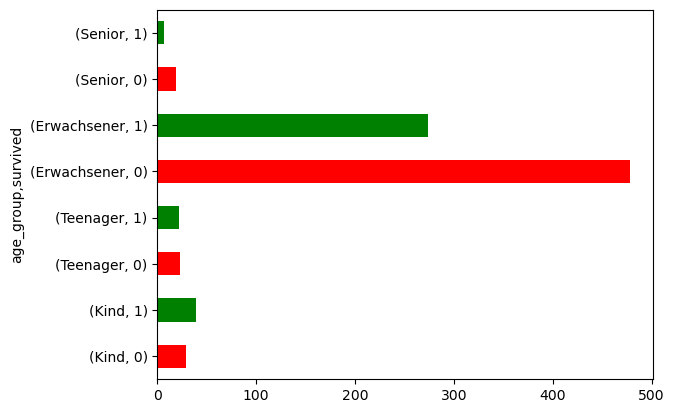

----------------------------------------------------------------------------------------------------


In [8]:
# Aufgabe 6: Altersgruppen erstellen mit .cut()
#Wir können numerische Daten in Kategorien (sogenannte "Bins") einteilen, um sie besser zu analysieren.
#Wichtig: Die age-Spalte hat fehlende Werte. Bevor ihr cut() nutzen könnt, müsst ihr diese auffüllen. Füllt sie mit dem Durchschnittsalter aller Passagiere auf. (Tipp: Nutzt df_working['age'].fillna(...) und inplace=True.)
#Definiert Altersbereiche (Bins) und passende Labels (Namen) für die Altersgruppen:
#Bins: [0, 12, 18, 60, 100] (Dies sind die Altersgrenzen: 0 bis unter 12, 12 bis unter 18, 18 bis unter 60, 60 bis unter 100 Jahre.)
#Labels: ['Kind', 'Teenager', 'Erwachsener', 'Senior']
#Erstellt eine neue Spalte namens age_group in eurem df_working-DataFrame mithilfe von pd.cut(). (Tipp: Denkt an right=False.)
#Zeigt die Spalten age und age_group der ersten 10 Zeilen an, um die neue Spalte zu überprüfen.
#Bonus-Aufgabe: Nutzt euer Wissen über groupby() und value_counts(), um zu sehen, wie viele Passagiere jeder neuen Altersgruppe überlebt haben (survived = 1) und wie viele nicht (survived = 0). (Tipp: normalize=True und .unstack() können hier nützlich sein.)
mean = df_working['age'].mean()
df_working['age'].fillna(value= mean, inplace=True)
kategorien = ['Kind','Teenager','Erwachsener','Senior']
einteilung = [0, 12, 18, 60, 100]
df_working['age_group'] = pd.cut(df_working['age'], bins=einteilung, labels=kategorien, right=False)
print('Aufgabe 6: cutting, binning')
print(df_working.loc[:9, ['age', 'age_group']]) 
survivors = df_working.groupby(['age_group', 'survived'], observed=True).size()   
print(survivors)
#PLot erstellen
survivors.plot(kind='barh', color=['red', 'green'])
plt.show()
print(100*'-')